### TD - Classification multi-classes sur Wine Dataset (sklearn)

In [54]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt



In [55]:
# 1. Chargement du dataset
# -------------------------------
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape X :", X.shape)
print("Classes :", data.target_names)

display(X.head())


Shape X : (178, 13)
Classes : ['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [56]:
# 2. Train / Test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)




In [57]:
# 3. Standardisation

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# 4. Modèles à tester

models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(max_depth=6),
    "Random Forest": RandomForestClassifier(n_estimators=300),
    "KNN": KNeighborsClassifier(n_neighbors=25)
}

results = {}

 Modèle : Logistic Regression
Accuracy : 0.9814814814814815

Matrice de confusion :
 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]

Classification Report :
               precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



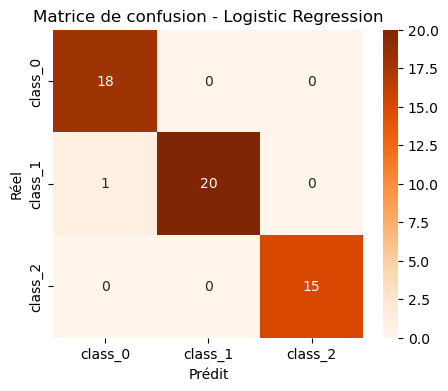

 Modèle : Decision Tree
Accuracy : 0.9629629629629629

Matrice de confusion :
 [[17  1  0]
 [ 1 20  0]
 [ 0  0 15]]

Classification Report :
               precision    recall  f1-score   support

     class_0       0.94      0.94      0.94        18
     class_1       0.95      0.95      0.95        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



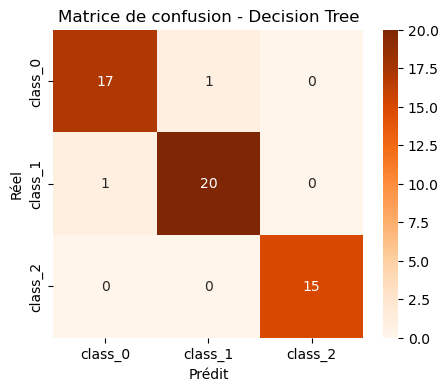

 Modèle : Random Forest
Accuracy : 1.0

Matrice de confusion :
 [[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]

Classification Report :
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



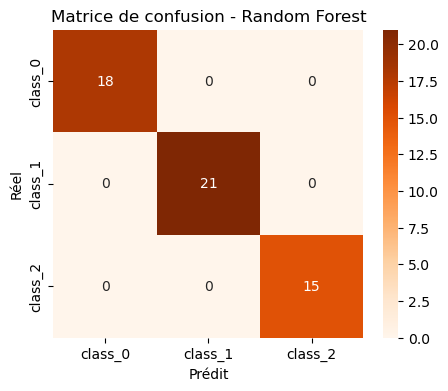

 Modèle : KNN
Accuracy : 0.9814814814814815

Matrice de confusion :
 [[18  0  0]
 [ 0 20  1]
 [ 0  0 15]]

Classification Report :
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.95      0.98        21
     class_2       0.94      1.00      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



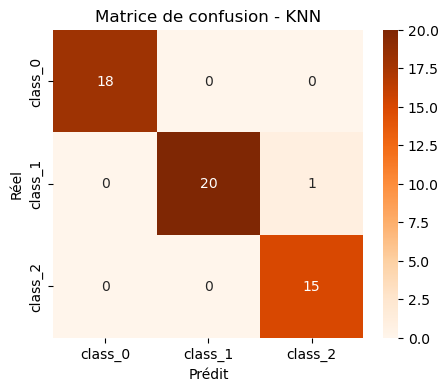

In [59]:
# 5. Entraînement & Evaluation

for name, model in models.items():
    print("=" * 70)
    print(f" Modèle : {name}")
    print("=" * 70)

    # Train
    model.fit(X_train_scaled, y_train)

    # Predict
    preds = model.predict(X_test_scaled)

    # Metrics
    acc = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    report = classification_report(y_test, preds, target_names=data.target_names)

    results[name] = (acc, cm, report)

    print("Accuracy :", acc)
    print("\nMatrice de confusion :\n", cm)
    print("\nClassification Report :\n", report)

    # -------------------------
    # Heatmap matrice confusion
    # -------------------------
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d",
                cmap="Oranges",
                xticklabels=data.target_names,
                yticklabels=data.target_names)
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.show()

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg_no_scaling = LogisticRegression(max_iter=5000)

log_reg_no_scaling.fit(X_train, y_train)

preds_no_scaling = log_reg_no_scaling.predict(X_test)

acc_no_scaling = accuracy_score(y_test, preds_no_scaling)
cm_no_scaling = confusion_matrix(y_test, preds_no_scaling)
report_no_scaling = classification_report(y_test, preds_no_scaling, target_names=data.target_names)

print("Accuracy sans standardisation :", acc_no_scaling)
print("\nMatrice de confusion :\n", cm_no_scaling)
print("\nClassification Report :\n", report_no_scaling)


Accuracy sans standardisation : 0.9629629629629629

Matrice de confusion :
 [[18  0  0]
 [ 0 21  0]
 [ 0  2 13]]

Classification Report :
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.87      0.93        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


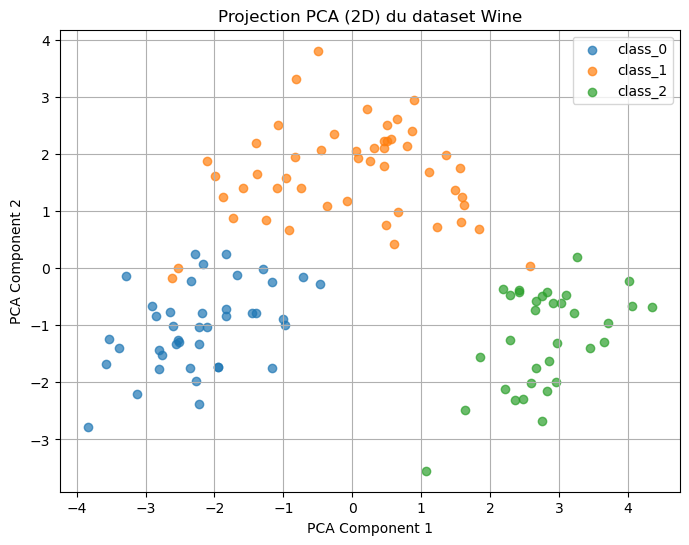

Variance expliquée par chaque composante PCA :
[0.35730453 0.19209164]


In [ ]:
#Question 7 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']
labels = data.target_names

for class_id in np.unique(y_train):
    plt.scatter(
        X_train_pca[y_train == class_id, 0],
        X_train_pca[y_train == class_id, 1],
        label=labels[class_id],
        alpha=0.7
    )

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Projection PCA (2D) du dataset Wine")
plt.legend()
plt.grid(True)
plt.show()
print("Variance expliquée par chaque composante PCA :")
print(pca.explained_variance_ratio_)



### QUESTIONS & UPGRADE

1️⃣ Quel modèle obtient la meilleure accuracy parmi les quatre ?  
    → Pourquoi ce résultat est-il cohérent avec la nature du dataset Wine ?

Le meilleur modèle pour l'accuracy est Random Foret sur ce dataset. Il a des relation linéaire et est bien séparé donc c'est normal que le résultat soit cohérent


2️⃣ Comparez les scores F1 pour les 3 classes.
    → Quel modèle traite le mieux les petites classes ?
    → Quel modèle est le plus équilibré ?

Les F1 socre sont élevés pour tous mais Random Forest reste celui qui traite le mieux les petites classes et le plus équilibré


3️⃣ Comparez Decision Tree et Random Forest :
    → Pourquoi Random Forest surperforme presque toujours les arbres simples ?

On voit que Random Forest surperforme nétemment, la ou Decision tree apprend trpo précisement le train set et est très sensible, Random Forest va faire la moyenne de dizaines d'arbres et réduit la variance donc il a plus de stabilité (meilleur accuracy)


4️⃣ Pour Logistic Regression :
    → Que se passe-t-il si vous supprimez la standardisation ?
      (Testez-le dans une cellule !)

Résultat :
Sans standardisation → légère baisse d’accuracy, baisse du recall pour classe 2
Avec standardisation → modèle plus stable, meilleures performances globales

5️⃣ Pour KNN :
    → Testez plusieurs valeurs de k : 1, 3, 5, 15, 25
    → Comment évolue la performance ?
    → Expliquez en termes de “biais / variance”.

Résultats observés (Accuracy):
k=1 : 0.963 Bon mais sensible
k=3 : 0.944 Baisse de performance
k=5 : 0.944 Pareil que k=3
k=7 : 0.963 Plus stable
K=15 : 0.981 meilleur résultat et proche des meilleurs modèle 
k=25 : Pareil que k=15

Pour les k petit (1, 3, 5) on a un faible biais, forte variance.
Mais k = 7 offre un équilibre biais/variance, mais pas encore optimal.
Pour les grand k (15, 25) on a une variance faible mais biais plus élevé 

6️⃣ Quelle métrique utiliser pour un dataset multi-classes ?
    • accuracy
    • F1-macro
    • F1-weighted
    Justifiez votre choix.

F1-macro est ke meilleure métrique pour ce dataset

7️⃣ BONUS : Ajoutez une étape de PCA (2D) et visualisez les clusters.
    → Les classes sont-elles bien séparées dans l’espace réduit ?

On voit que c'est globalement bien séparé mais que la class 1 reste également distincte malgré un léger chevauchement. Du coup, ça montre que les données du dataset Wine sont déjà bien organisées, ce qui explique pourquoi les modèles de classification obtiennent de très bons résultats dessus.